#There's no magic here.

We've all heard a proselytizing hyperbolist make the an-AI-is-going-to-steal-my-job speech. If you subscribe, look at the following code cell. It demonstrates all the tenets of deep learning. You'll find a simple system composed exclusively of multiply and add operations. That's all that happens inside a neural network. Multiply and add.

A neural network is nothing but a nonlinear system of equations like $y = \sigma(w x + b)$. Seriously.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.regularizers import l2
tf.__version__

Using TensorFlow backend.


'2.0.0'

In [2]:
import numpy as np

d0=pd.read_csv('application_data.csv')
print(d0.head(5))

X = d0.drop(['n','m','Unnamed: 5','Unnamed: 6'], axis=1)
print(X.shape)
X=X.values
print(type(X))



   Pore Volume of Water Injected  Pore Volume of Oil Produced  WaterCut    n  \
0                            0.1                      0.00000   0.00000  1.5   
1                            0.2                      0.02345  -0.82497  1.5   
2                            0.3                      0.10994  -0.89346  1.5   
3                            0.4                      0.14279  -0.00705  1.5   
4                            0.5                      0.14329  -0.00314  1.5   

     m  Unnamed: 5  Unnamed: 6  
0  7.0         1.0         NaN  
1  7.0         NaN         NaN  
2  7.0         NaN         NaN  
3  7.0         NaN         NaN  
4  7.0         NaN         NaN  
(5929, 3)
<class 'numpy.ndarray'>


In [3]:
X=X.reshape(121,147)
print(X)

[[ 1.0000e-01  0.0000e+00  0.0000e+00 ...  4.9000e+00  1.3568e-01
   1.6300e-03]
 [ 1.0000e-01  0.0000e+00  0.0000e+00 ...  4.9000e+00  1.2572e-01
   1.7600e-03]
 [ 1.0000e-01  0.0000e+00  0.0000e+00 ...  4.9000e+00  1.1484e-01
   1.8700e-03]
 ...
 [ 1.0000e-01  0.0000e+00  0.0000e+00 ...  4.9000e+00  8.8300e-03
  -4.2000e-04]
 [ 1.0000e-01  0.0000e+00  0.0000e+00 ...  4.9000e+00 -5.6700e-03
  -7.8000e-04]
 [ 1.0000e-01  0.0000e+00  0.0000e+00 ...  4.9000e+00 -1.9990e-02
  -1.6700e-03]]


In [4]:
y = np.zeros((121, 2))

In [5]:
k = 0

for ele1 in np.arange(1.5,7,0.5):  
    for ele2 in np.arange(7,1.5,-0.5):
        y[k][0] = ele1
        y[k][1] = ele2
        k = k + 1          
print(y)
print(y.shape)

[[1.5 7. ]
 [1.5 6.5]
 [1.5 6. ]
 [1.5 5.5]
 [1.5 5. ]
 [1.5 4.5]
 [1.5 4. ]
 [1.5 3.5]
 [1.5 3. ]
 [1.5 2.5]
 [1.5 2. ]
 [2.  7. ]
 [2.  6.5]
 [2.  6. ]
 [2.  5.5]
 [2.  5. ]
 [2.  4.5]
 [2.  4. ]
 [2.  3.5]
 [2.  3. ]
 [2.  2.5]
 [2.  2. ]
 [2.5 7. ]
 [2.5 6.5]
 [2.5 6. ]
 [2.5 5.5]
 [2.5 5. ]
 [2.5 4.5]
 [2.5 4. ]
 [2.5 3.5]
 [2.5 3. ]
 [2.5 2.5]
 [2.5 2. ]
 [3.  7. ]
 [3.  6.5]
 [3.  6. ]
 [3.  5.5]
 [3.  5. ]
 [3.  4.5]
 [3.  4. ]
 [3.  3.5]
 [3.  3. ]
 [3.  2.5]
 [3.  2. ]
 [3.5 7. ]
 [3.5 6.5]
 [3.5 6. ]
 [3.5 5.5]
 [3.5 5. ]
 [3.5 4.5]
 [3.5 4. ]
 [3.5 3.5]
 [3.5 3. ]
 [3.5 2.5]
 [3.5 2. ]
 [4.  7. ]
 [4.  6.5]
 [4.  6. ]
 [4.  5.5]
 [4.  5. ]
 [4.  4.5]
 [4.  4. ]
 [4.  3.5]
 [4.  3. ]
 [4.  2.5]
 [4.  2. ]
 [4.5 7. ]
 [4.5 6.5]
 [4.5 6. ]
 [4.5 5.5]
 [4.5 5. ]
 [4.5 4.5]
 [4.5 4. ]
 [4.5 3.5]
 [4.5 3. ]
 [4.5 2.5]
 [4.5 2. ]
 [5.  7. ]
 [5.  6.5]
 [5.  6. ]
 [5.  5.5]
 [5.  5. ]
 [5.  4.5]
 [5.  4. ]
 [5.  3.5]
 [5.  3. ]
 [5.  2.5]
 [5.  2. ]
 [5.5 7. ]
 [5.5 6.5]
 [5.5 6. ]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.19834,random_state=0)
print('X_train:',X_train.shape,'\n')
print('y_train:',y_train.shape)
print('X_test:',X_test.shape,'\n')
print('y_test:',y_test.shape)

X_train: (97, 147) 

y_train: (97, 2)
X_test: (24, 147) 

y_test: (24, 2)


In [7]:
ann=tf.keras.Sequential()
dense=tf.keras.layers
#input and first layer
ann.add(dense.Dense(units=128,input_dim=147,activation='relu', activity_regularizer=l2(0.01)))

#second layer
ann.add(dense.Dense(units=128,activation='relu'))
#third layer
#ann.add(dense.Dense(units=32,activation='relu'))
#fourth layer
#ann.add(dense.Dense(units=32,activation='relu'))
#fifth layer
#ann.add(dense.Dense(units=32,activation='relu'))
#sixth layer
#ann.add(dense.Dense(units=32,activation='relu'))
#output layer
ann.add(dense.Dense(units=2))



In [8]:
ann.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])


#Training Model
#history=ann.fit(X,y,epochs=100)
history = ann.fit(X_train, y_train,epochs=250,validation_split = 0.1157) 
#loss,acc=ann.evaluate(X,y,verbose=2)
ann.summary()

Train on 85 samples, validate on 12 samples
Epoch 1/250
85/85 [==============================] - 2s 27ms/sample - loss: 9.7914 - accuracy: 0.5412 - val_loss: 5.1275 - val_accuracy: 0.6667
Epoch 2/250
85/85 [==============================] - 0s 384us/sample - loss: 5.2346 - accuracy: 0.6000 - val_loss: 6.3488 - val_accuracy: 0.4167
Epoch 3/250
85/85 [==============================] - 0s 255us/sample - loss: 5.6383 - accuracy: 0.5412 - val_loss: 5.3275 - val_accuracy: 0.4167
Epoch 4/250
85/85 [==============================] - 0s 269us/sample - loss: 4.5479 - accuracy: 0.5412 - val_loss: 4.4344 - val_accuracy: 0.4167
Epoch 5/250
85/85 [==============================] - 0s 281us/sample - loss: 4.2146 - accuracy: 0.5412 - val_loss: 4.3532 - val_accuracy: 0.4167
Epoch 6/250
85/85 [==============================] - 0s 263us/sample - loss: 4.2459 - accuracy: 0.5882 - val_loss: 4.1086 - val_accuracy: 0.5833
Epoch 7/250
85/85 [==============================] - 0s 250us/sample - loss: 3.8776 - a

85/85 [==============================] - 0s 279us/sample - loss: 0.1921 - accuracy: 0.8824 - val_loss: 0.2196 - val_accuracy: 1.0000
Epoch 113/250
85/85 [==============================] - 0s 270us/sample - loss: 0.1879 - accuracy: 0.8941 - val_loss: 0.2310 - val_accuracy: 1.0000
Epoch 114/250
85/85 [==============================] - 0s 292us/sample - loss: 0.2001 - accuracy: 0.8941 - val_loss: 0.2855 - val_accuracy: 1.0000
Epoch 115/250
85/85 [==============================] - 0s 259us/sample - loss: 0.2070 - accuracy: 0.9294 - val_loss: 0.2950 - val_accuracy: 1.0000
Epoch 116/250
85/85 [==============================] - 0s 289us/sample - loss: 0.2684 - accuracy: 0.8941 - val_loss: 0.2191 - val_accuracy: 1.0000
Epoch 117/250
85/85 [==============================] - 0s 264us/sample - loss: 0.2100 - accuracy: 0.9059 - val_loss: 0.2246 - val_accuracy: 1.0000
Epoch 118/250
85/85 [==============================] - 0s 387us/sample - loss: 0.2013 - accuracy: 0.9529 - val_loss: 0.2064 - val_ac

Epoch 168/250
85/85 [==============================] - 0s 403us/sample - loss: 0.1190 - accuracy: 0.9765 - val_loss: 0.1516 - val_accuracy: 1.0000
Epoch 169/250
85/85 [==============================] - 0s 376us/sample - loss: 0.1138 - accuracy: 0.9647 - val_loss: 0.1604 - val_accuracy: 1.0000
Epoch 170/250
85/85 [==============================] - 0s 297us/sample - loss: 0.1200 - accuracy: 0.9294 - val_loss: 0.2037 - val_accuracy: 1.0000
Epoch 171/250
85/85 [==============================] - 0s 351us/sample - loss: 0.1282 - accuracy: 0.9529 - val_loss: 0.1574 - val_accuracy: 1.0000
Epoch 172/250
85/85 [==============================] - 0s 426us/sample - loss: 0.1222 - accuracy: 0.9529 - val_loss: 0.1641 - val_accuracy: 1.0000
Epoch 173/250
85/85 [==============================] - 0s 472us/sample - loss: 0.1105 - accuracy: 0.9176 - val_loss: 0.2073 - val_accuracy: 1.0000
Epoch 174/250
85/85 [==============================] - 0s 426us/sample - loss: 0.1185 - accuracy: 0.9765 - val_loss: 0

Epoch 224/250
85/85 [==============================] - 0s 426us/sample - loss: 0.0775 - accuracy: 0.9765 - val_loss: 0.1056 - val_accuracy: 1.0000
Epoch 225/250
85/85 [==============================] - 0s 390us/sample - loss: 0.0709 - accuracy: 0.9529 - val_loss: 0.1076 - val_accuracy: 1.0000
Epoch 226/250
85/85 [==============================] - 0s 386us/sample - loss: 0.0724 - accuracy: 0.9647 - val_loss: 0.1064 - val_accuracy: 1.0000
Epoch 227/250
85/85 [==============================] - 0s 355us/sample - loss: 0.0701 - accuracy: 0.9412 - val_loss: 0.1073 - val_accuracy: 1.0000
Epoch 228/250
85/85 [==============================] - 0s 449us/sample - loss: 0.0686 - accuracy: 0.9765 - val_loss: 0.1069 - val_accuracy: 1.0000
Epoch 229/250
85/85 [==============================] - 0s 383us/sample - loss: 0.0681 - accuracy: 0.9529 - val_loss: 0.1037 - val_accuracy: 1.0000
Epoch 230/250
85/85 [==============================] - 0s 296us/sample - loss: 0.0686 - accuracy: 0.9529 - val_loss: 0

Test score: 0.0784297063946724
Test accuracy: 1.0
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


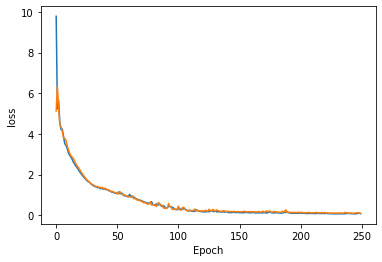

In [10]:
score = ann.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
print(history.history.keys())
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
plt.plot(hist['epoch'],hist['loss'])
plt.plot(hist['epoch'],hist['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

In [11]:
y_pred = ann.predict(X_test)


In [12]:
column_values=['Predicted m Values', 'Predicted n Values']
column1_values=['Actual m Values', 'Actual n Values']
df=pd.DataFrame(data=y_pred,columns=column_values)
df1=pd.DataFrame(data=y_test,columns=column1_values)
dg=pd.concat([df,df1],axis=1)
print(dg.head(30))

    Predicted m Values  Predicted n Values  Actual m Values  Actual n Values
0             3.706571            5.139865              3.5              5.0
1             5.773705            4.009747              5.5              4.0
2             5.601521            3.532450              5.5              3.5
3             1.091190            2.876751              1.5              3.0
4             5.552953            2.570204              5.5              2.5
5             2.873100            7.136643              2.5              7.0
6             1.245084            3.403933              1.5              3.5
7             1.444702            1.964767              1.5              2.0
8             3.669501            6.665467              3.5              6.5
9             5.587824            6.515583              5.5              6.5
10            3.228519            7.119569              3.0              7.0
11            3.678571            4.077364              3.5              4.0

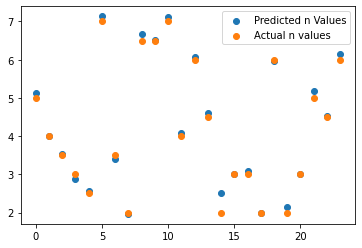

In [13]:
import matplotlib.pyplot as plt
arr=np.arange(0,24)
dg['newcol'] = arr.tolist()
dg
xs1=dg['newcol']
ys1=dg['Predicted n Values']
ys2=dg['Actual n Values']
plt.scatter(xs1,ys1,label='Predicted n Values')
plt.scatter(xs1,ys2,label='Actual n values')
plt.legend()
plt.show()

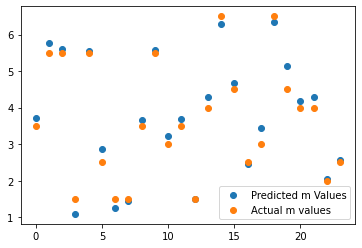

In [14]:
import matplotlib.pyplot as plt
arr=np.arange(0,24)
dg['newcol'] = arr.tolist()
dg
xs1=dg['newcol']
ys1=dg['Predicted m Values']
ys2=dg['Actual m Values']
plt.scatter(xs1,ys1,label='Predicted m Values')
plt.scatter(xs1,ys2,label='Actual m values')
plt.legend()
plt.show()

In [15]:
query= pd.read_csv('d2.csv')
query=query.values
query=query.reshape(1,147)
print(query)

[[1.0e-01 0.0e+00 0.0e+00 2.0e-01 0.0e+00 0.0e+00 3.0e-01 0.0e+00 0.0e+00
  4.0e-01 0.0e+00 0.0e+00 5.0e-01 1.0e-04 1.0e-04 6.0e-01 1.0e-04 1.0e-04
  7.0e-01 1.0e-04 1.0e-04 8.0e-01 1.0e-04 1.0e-04 9.0e-01 1.0e-04 1.0e-04
  1.0e+00 1.0e-04 1.0e-04 1.1e+00 1.0e-04 1.0e-04 1.2e+00 1.0e-04 1.0e-04
  1.3e+00 1.0e-04 1.0e-04 1.4e+00 1.0e-04 1.0e-04 1.5e+00 1.0e-04 1.0e-04
  1.6e+00 1.0e-04 1.0e-04 1.7e+00 1.0e-04 1.0e-04 1.8e+00 1.0e-04 1.0e-04
  1.9e+00 1.0e-04 1.0e-04 2.0e+00 1.0e-04 1.0e-04 2.1e+00 1.0e-04 1.0e-04
  2.2e+00 1.0e-04 1.0e-04 2.3e+00 1.0e-04 1.0e-04 2.4e+00 1.0e-04 1.0e-04
  2.5e+00 1.0e-04 1.0e-04 2.6e+00 1.0e-04 1.0e-04 2.7e+00 1.0e-04 1.0e-04
  2.8e+00 1.0e-04 1.0e-04 2.9e+00 1.0e-04 1.0e-04 3.0e+00 1.0e-04 1.0e-04
  3.1e+00 1.0e-04 1.0e-04 3.2e+00 1.0e-04 1.0e-04 3.3e+00 1.0e-04 1.0e-04
  3.4e+00 1.0e-04 1.0e-04 3.5e+00 1.0e-04 1.0e-04 3.6e+00 1.0e-04 1.0e-04
  3.7e+00 1.0e-04 1.0e-04 3.8e+00 1.0e-04 1.0e-04 3.9e+00 1.0e-04 1.0e-04
  4.0e+00 1.0e-04 1.0e-04 4.1e+00 1.0e

In [16]:
y_pred1 = ann.predict(query)
print(y_pred1)

[[3.7983809 2.551602 ]]


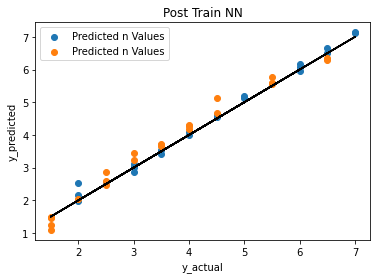

In [17]:
import matplotlib.pyplot as plt
xs1=df1['Actual n Values']
ys1=df['Predicted n Values']
ys2=df1['Actual n Values']
xt1=df1['Actual m Values']
yt1=df['Predicted m Values']
yt2=df1['Actual m Values']
fig,ax=plt.subplots()
ax.scatter(xs1,ys1,label='Predicted n Values')
ax.plot(xs1,ys2,color='black')
ax.scatter(xt1,yt1,label='Predicted n Values')
ax.plot(xt1,yt2,color='black')
plt.xlabel('y_actual')
plt.ylabel('y_predicted')
plt.title('Post Train NN')
plt.legend()
plt.show()

In [18]:

X11=X[25]

X11=X11.reshape(1,-1)
print('reshape of X11=',X11.shape)
y_pred2= ann.predict(X11)
print(y_pred2)
print (y[25])

reshape of X11= (1, 147)
[[2.5394943 5.629893 ]]
[2.5 5.5]


In [19]:
X12=X[100]

X12=X12.reshape(1,-1)
print('reshape of X11=',X11.shape)
y_pred2= ann.predict(X12)
print(y_pred2)
print (y[100])

reshape of X11= (1, 147)
[[5.9571114 6.4561973]]
[6.  6.5]
